# The Dataset: Background

The EEG data to be used in this study was previously acquired by the Delis lab, while a subject performed a visual discrimination task. It was selected for this study as the task-relevant neural signatures are well-established and could therefore be applied for benchmarking our data analysis methods. The methods employed to acquire the dataset are described in full in [Delis et al., 2016](https://www.sciencedirect.com/science/article/pii/S1053811916002482), with the paradigm for the study pictured below.

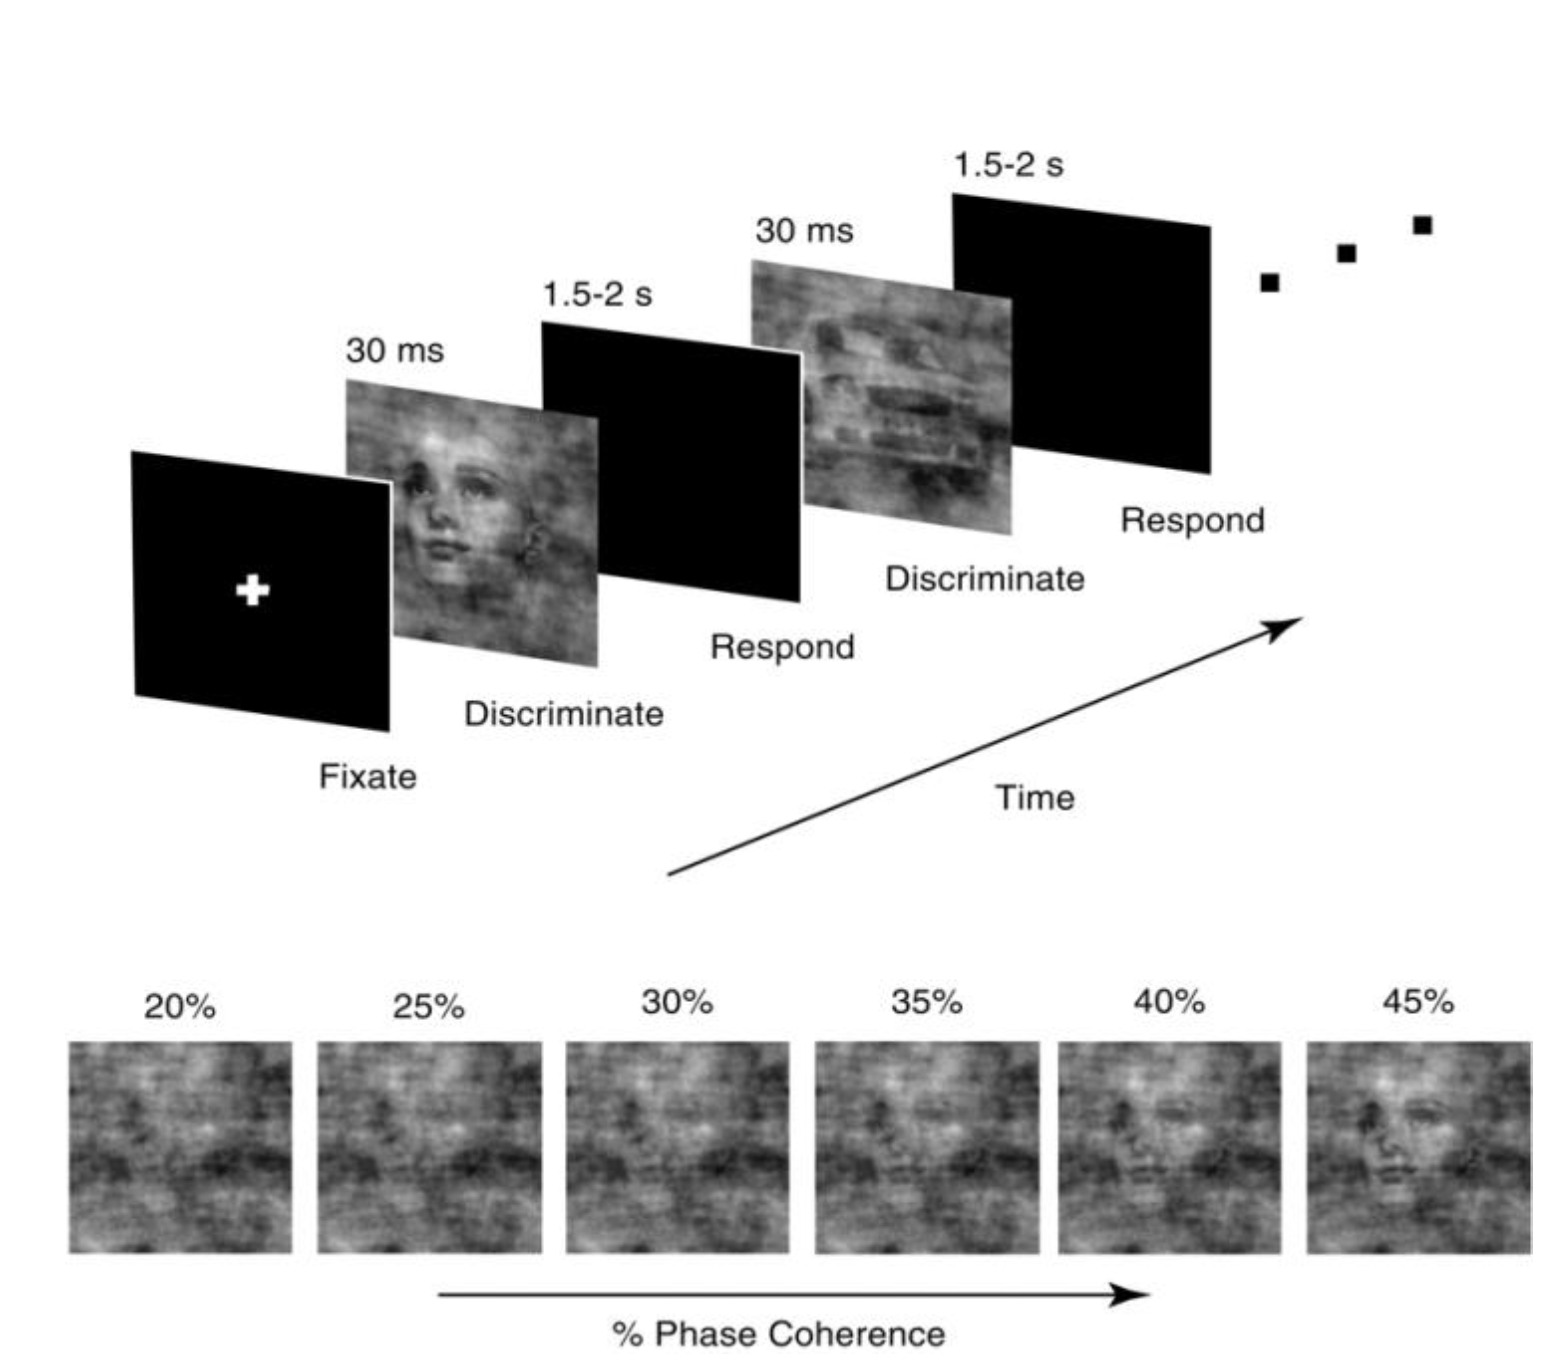

*Figure 1: The study paradigm. Within each trial, the subject was randomly presented with an image of a face or a car at six coherence levels (20, 25, 30, 35, 40, 45%). The subject had to discriminate the image category and confirm their decision with a button press. The images were presented for 30 ms with inter-stimulus intervals of 1.5 - 2 seconds.*

The received dataset contained EEG signals recorded from 60 scalp electrode during 477 trials of a face-vs-car visual categorisation task. The trials were in fragments of 700 milliseconds, of which 200 ms were before stimulus onset, and 500 ms after it. The trials were labeled according to their corresponding stimulus, which was either an image of a face or a car, at 6 phase coherence values (20, 25, 30, 35, 40 and 45%) within each category. 

# Pre-Processing

The raw EEG file I received was stored in a MATLAB dictionary, which I had to convert into a structure compatible with [MNE-Python](https://mne.tools/stable/index.html). MNE-Python describes itself as an open-source Python package for exploring, visualizing, and analyzing human neurophysiological data. 

## Loading the raw file

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
import mne
from mne.externals.pymatreader import read_mat

In [5]:
raw = read_mat('/Users/anastasiakuzmich/Downloads/Marios_data/Data.mat') 
raw.keys()

dict_keys(['__header__', '__version__', '__globals__', 'CarData', 'FaceData', 'CarData2', 'FaceData2', 'AllData', 'AllData2', 'stiml', 'stim'])

✏️ Extracting the file I'm interested in: 

In [6]:
data = raw['AllData2'] # this is 
data.shape

(28620, 700)

## Reshaping into a 3-dimensional array 

This is an MNE requirement. The new structure shape will be shaped as follows: 

    trials x channels x time (ms)

In [7]:
data = data.reshape(477, 60, 700)

## Adding the known data collection details

✏️  Loading the channel Biosemi64 channel locations (see image below):

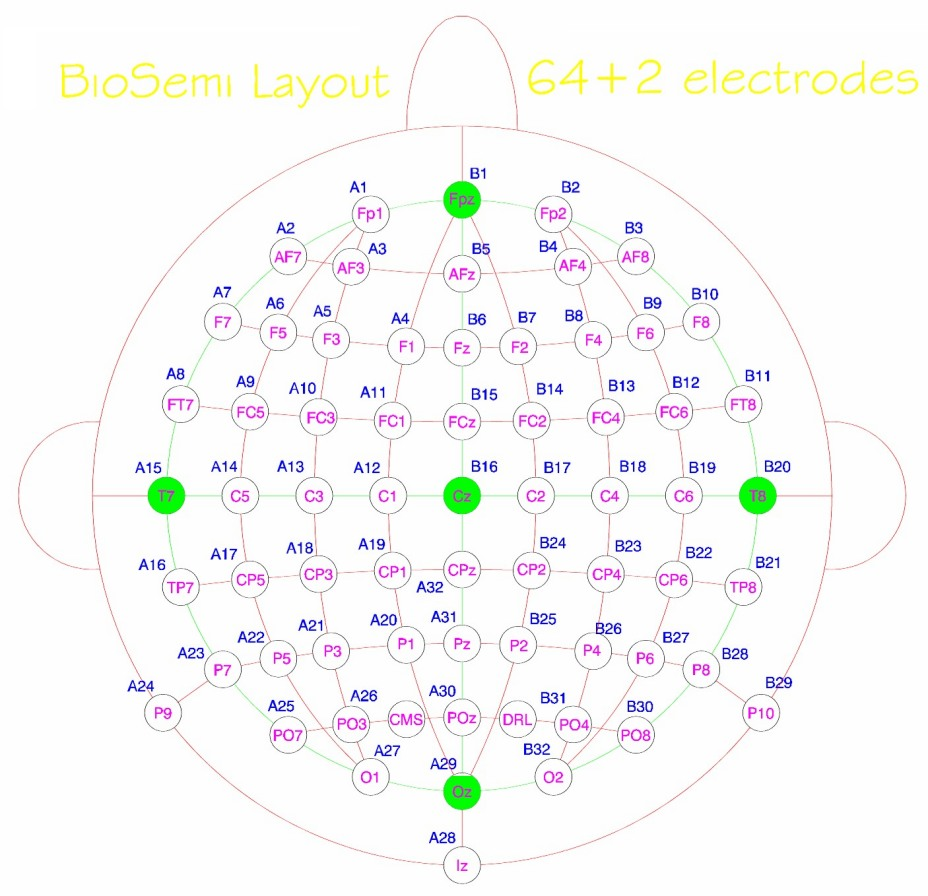

In [8]:
montage = mne.channels.make_standard_montage('biosemi64')

✏️ Establishing some variables reflecting the data collection methods and creating an MNE info structure (again, it's a requirement):

In [9]:
ch_names = ['Fp1', 'Fp2', 'Fpz', 'AF3',  'AF4', 'AF7', 'AF8', 'F1', 'F3', 'F5', 'F7', 'Fz', 'F2', 'F4', 'F6', 'F8', 
            'FT7', 'FC5','FC3','FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'C1', 'C3', 'C5',  'Cz', 'C2', 'C4', 'C6', 
            'T8', 'TP7', 'TP8', 'T7','CP5', 'CP3', 'CP1',  'CP6', 'CP4', 'CP2', 'CPz', 'P1', 'P3', 'P5', 'P7', 'Pz', 
            'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2'] # the channel names

ch_types = 'eeg' # the channel types
sfreq = 1000 # sampling frequency
montage = 'biosemi64' # electrode cap montage
tmin = -0.2 # time before the stimulus onset

info = mne.create_info(ch_names, sfreq, ch_types)

## Creating the task dictionary

✏️ The task category labels are stored within the "stiml" key in our dictionary, whereby: 

    1 = Face + Coherence Level 1 (20%)
    2 = Face + Coherence Level 2 (25%)
    3 = Face + Coherence Level 3 (30%)
    4 = Face + Coherence Level 4 (35%)
    5 = Face + Coherence Level 5 (40%)
    6 = Face + Coherence Level 6 (45%)
    7 = Car + Coherence Level 1 (20%)
    8 = Car + Coherence Level 2 (25%)
    9 = Car + Coherence Level 3 (30%)
    10 = Car + Coherence Level 4 (35%)
    11 = Car + Coherence Level 5 (40%)
    12 = Car + Coherence Level 6 (45%)

In [10]:
coherence = raw['stiml']
coherence.shape
print(coherence)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9

✏️ I'll be using these labels to create an "events" structure necessary for MNE analysis:

In [11]:
a = list(range(477)) # 477 epochs
b = [700] * 477 # 700ms each
c = coherence.tolist() # task labels

events = np.column_stack([a, b, c])
print(events)

[[  0 700   1]
 [  1 700   1]
 [  2 700   1]
 ...
 [474 700  12]
 [475 700  12]
 [476 700  12]]


✏️ Defining an events data dictionary:

In [12]:
event_id = {'face/1': 1, 
            'face/2': 2, 
            'face/3': 3,
            'face/4': 4, 
            'face/5': 5, 
            'face/6': 6,
            'car/1': 7, 
            'car/2': 8, 
            'car/3': 9,
            'car/4': 10, 
            'car/5': 11,
            'car/6': 12}

## Converting into an MNE-Compatible data structure

✏️ Finally, creating an epochs array:

In [13]:
epochs = mne.EpochsArray(data, 
                         info, 
                         events, 
                         tmin, 
                         event_id)

epochs.set_montage(montage)

Not setting metadata
Not setting metadata
477 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


Number of events,477
Events,car/1: 40car/2: 40car/3: 39car/4: 39car/5: 40car/6: 40face/1: 39face/2: 40face/3: 40face/4: 40face/5: 40face/6: 40
Time range,-0.200 – 0.499 sec
Baseline,off


✏️ Quick plot to sanity check:

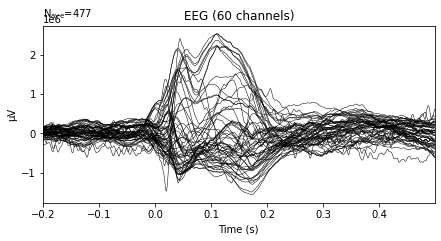

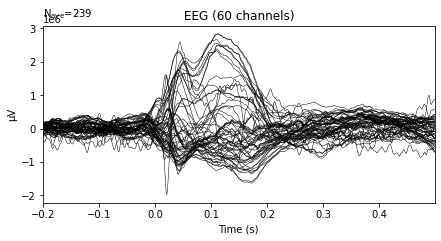

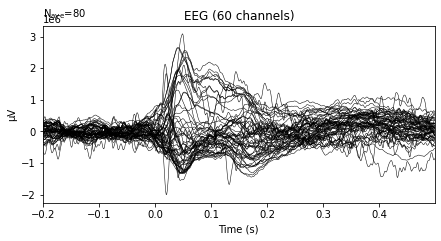

In [14]:
epochs.average().plot()
epochs['face'].average().plot()
epochs['6'].average().plot();

✏️ All good visually, so saving the epoch file:

In [15]:
epochs.save('epochs-epo.fif', overwrite=True)

Overwriting existing file.
